<a href="https://colab.research.google.com/github/hansschaa/Tarea1_ML/blob/master/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

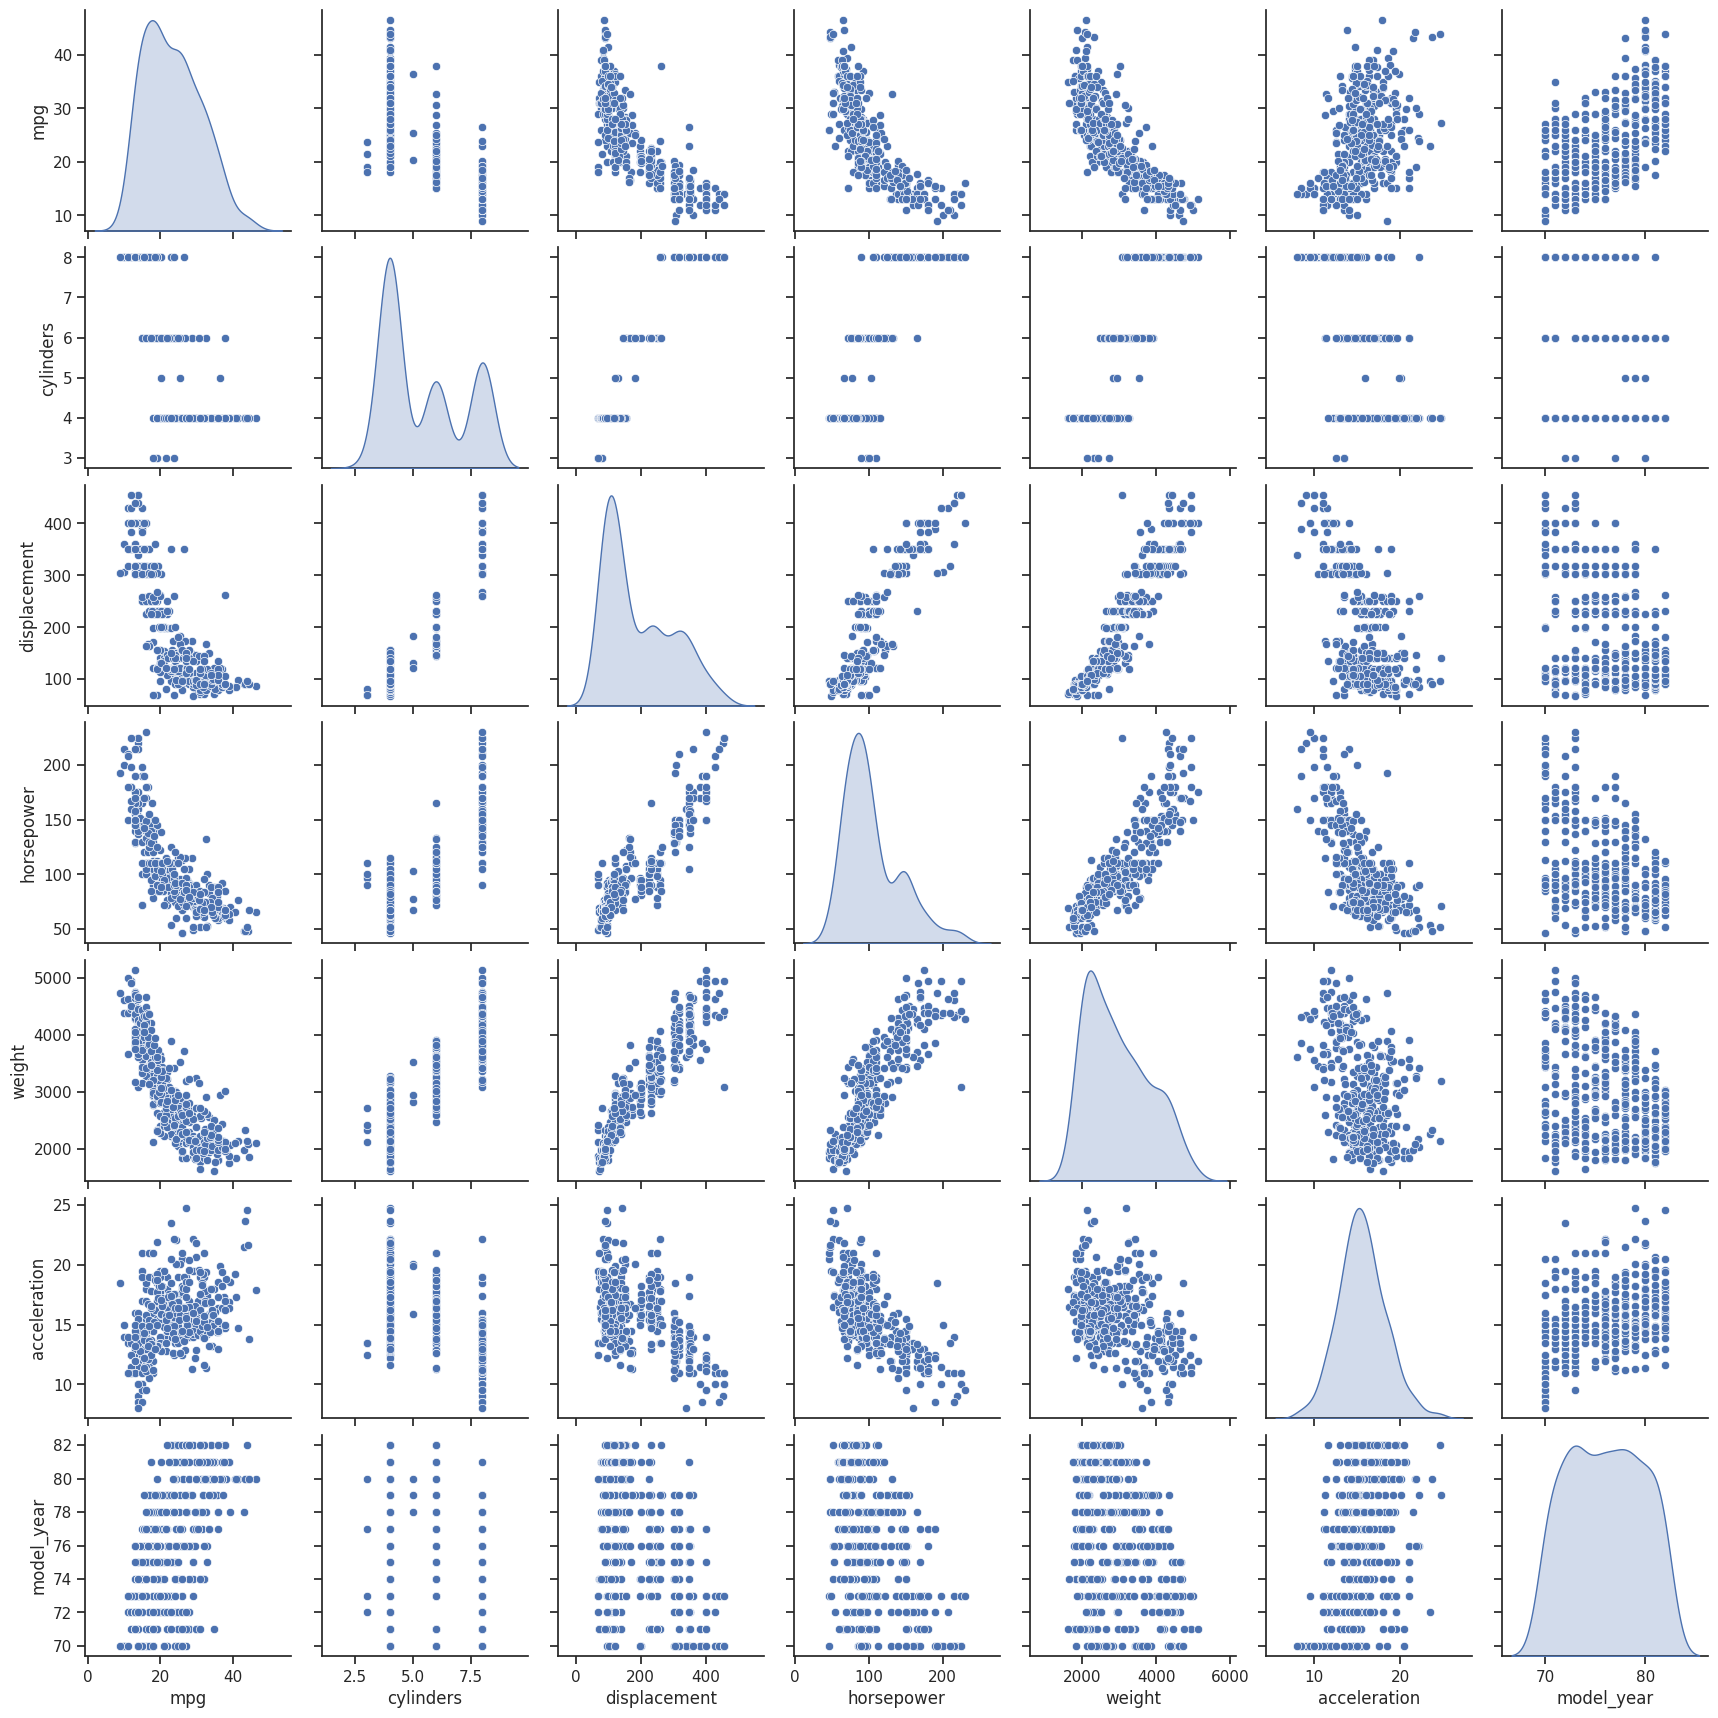

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

mpg = sns.load_dataset("mpg")
#print(mpg.head(30))

sns.set(style="ticks")
sns.pairplot(mpg, diag_kind="kde")
plt.show()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<ipython-input-2-8aec3fcede63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mpg.corr()


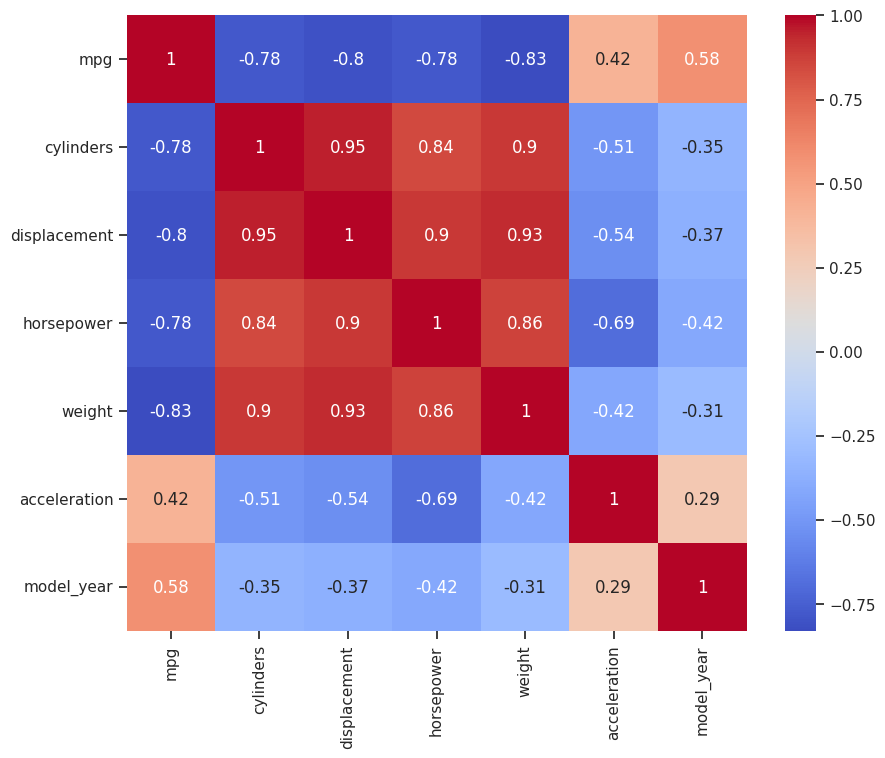

In [2]:
correlation_matrix = mpg.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

mpg = sns.load_dataset("mpg")
mpg = mpg.dropna()

X = mpg.drop(['mpg', 'model_year', 'origin', 'name'], axis=1)
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

*   MSE: mide el promedio de los errores al cuadrado, dando más peso a errores más grandes.
*   $R^2$: medida de qué tan bien se ajustan las predicciones a los datos reales. Un R² cercano a 1 indica un buen ajuste.
*   MAE: promedio de los valores absolutos de los errores.

In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar las métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 19.00
R-squared (R²): 0.69
Mean Absolute Error (MAE): 3.36


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


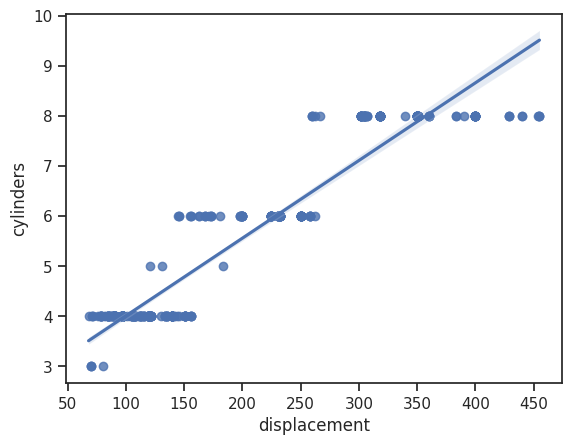

In [5]:
most_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
sns.regplot(x=most_correlated.index[1][0], y=most_correlated.index[1][1], data=mpg);


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.